[ 0.  0.  0.  0.]


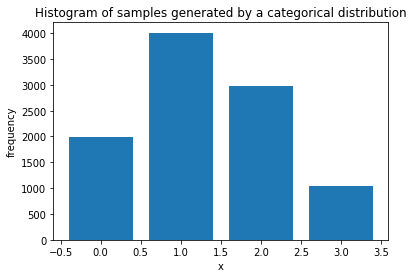

In [11]:
from sampler import Categorical
import matplotlib.pyplot as plt
catDistribution = [0.2,0.4,0.3,0.1]
splCat = Categorical(catDistribution)
samples = np.zeros((len(catDistribution),))
print samples
for i in range(10000):
    index = splCat.sample()
    samples[index] += 1


# print samples
# print type(samples)
# print samples.shape
# print type(samples[0])
fig1 = plt.figure()
plt.bar([0,1,2,3],samples)
plt.xlabel("x")
plt.ylabel("frequency")
plt.title("Histogram of samples generated by a categorical distribution")
plt.show()
fig1.savefig("./samplefigs/fig1.png")    





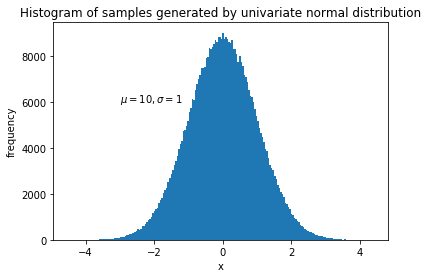

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sampler import UnivariateNormal

spl = UnivariateNormal(10, 1)
samples = []
for i in range(500000):
    samples.append(spl.sample())
    
fig2 = plt.figure()
plt.hist(samples, bins = 200)
# plt.hist(np.array([1,2,3,4,4]), bins = 4)
plt.xlabel("x")
plt.ylabel("frequency")
plt.text(-3, 6000, '$\mu=10,\sigma=1$')
plt.title("Histogram of samples generated by univariate normal distribution")
plt.show()
fig2.savefig("./samplefigs/fig2.png")    



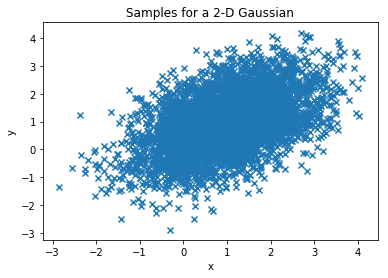

In [8]:
from sampler import MultiVariateNormal
import numpy as np
import matplotlib.pyplot as plt

Mu = np.array([1,1]).T
Sigma = np.array([[1, 0.5], [0.5, 1]])
splMulNorm = MultiVariateNormal(Mu, Sigma)

sampleNumber = 5000
xsamples = np.zeros((sampleNumber,))
ysamples = np.zeros((sampleNumber,))
for i in range(sampleNumber):
    xytuple = splMulNorm.sample()
    xsamples[i] = xytuple[0]
    ysamples[i] = xytuple[1]

fig3 = plt.figure()    
plt.scatter(xsamples, ysamples, marker = "x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Samples for a 2-D Gaussian")
plt.show()
fig3.savefig("./samplefigs/fig3.png")    


The probability that a sample from this distribution lies within the unit circle at $(0.1, 0.2)$ is 0.8373


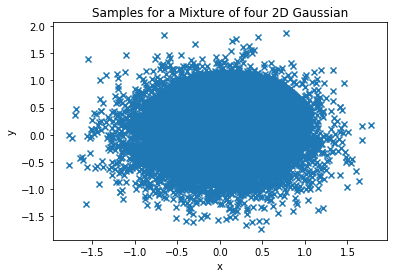

In [9]:
from sampler import MultiVariateNormal
from sampler import MixtureModel
import numpy as np
import matplotlib.pyplot as plt
Sigma = np.array([[1, 0], [0, 1]])
samplerModels = [
    MultiVariateNormal(np.array([1,1]).T, Sigma),
    MultiVariateNormal(np.array([1,-1]).T, Sigma),
    MultiVariateNormal(np.array([-1,1]).T, Sigma),
    MultiVariateNormal(np.array([-1,-1]).T, Sigma)
]
splMixtureModel = MixtureModel([0.25, 0.25, 0.25, 0.25], samplerModels)
# splMixtureModel = MixtureModel([0.0, 0, 0, 0], samplerModels)


# print splMixtureModel.sample()

# fig4 = plt.figure()
sampleNumber = 1000
xsamples = np.zeros((sampleNumber,))
ysamples = np.zeros((sampleNumber,))
count = 0;
for i in range(sampleNumber):
    xytuple = splMixtureModel.sample()
    xsamples[i] = xytuple[0]
    ysamples[i] = xytuple[1]
    if ((xytuple[0]-0.1)**2 + (xytuple[1]-0.2)**2 <= 1):
        count += 1

probInCircle = 1.0 * count / sampleNumber
print "The probability that a sample from this distribution lies within the unit circle at $(0.1, 0.2)$ is", probInCircle
    

circle = plt.Circle((0.1,0.2),1.0)
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle)
plt.scatter(xsamples, ysamples, marker = "x")
plt.xlabel("x")
plt.ylabel("y")


plt.title("Samples for a Mixture of four 2D Gaussian")
plt.show()
# fig4.savefig("./samplefigs/fig4.png")
